# HW1 - Classifiers

## 1. Digit Recognizer

In [1]:
# import libraries
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix


#### (a)

In [2]:
# read training and testing data
training_data=pd.read_csv("Digit_Recognition_Data/train.csv")
testing_data=pd.read_csv("Digit_Recognition_Data/test.csv")

In [3]:
# function to display the MNIST digit indicated by the label parameter
def findDigit(label, data):
    digitIndex = list(labels).index(label)
    return data[digitIndex,:,:], digitIndex

In [4]:
labels=training_data['label'].values #extract data labels
data = training_data.drop(['label'],axis=1).values # extract data values
data_shaped = data.reshape(-1,28,28) # shape data for display

#### (b)

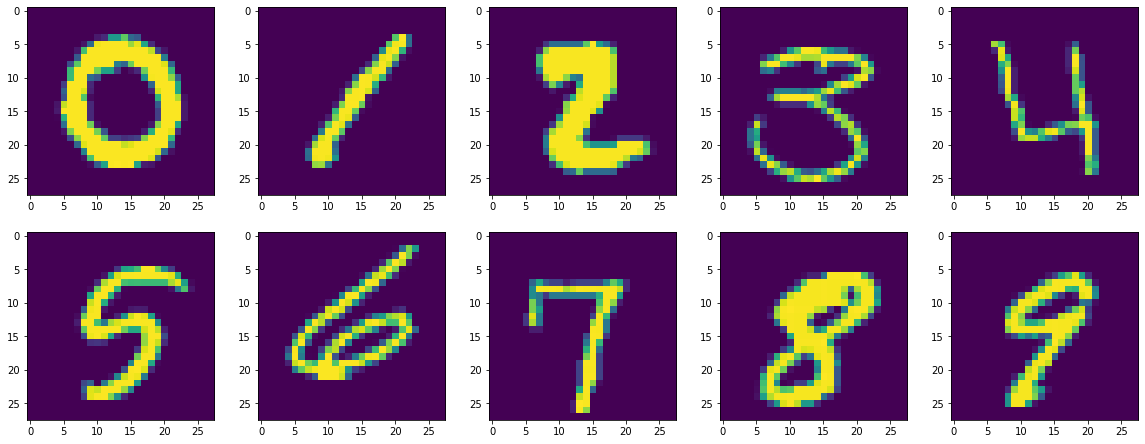

In [29]:
# plot one of each digit
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(5,5,i+1)
    digit, indx = findDigit(i, data_shaped)
    imshow(digit)

#### (c)

In [30]:
# function to calculate the prior probability of the class indicated by the label parameter
def calculatePrior(label):
    return np.count_nonzero(labels == label)/(42000)

Prior probability for  0 :  0.09838095238095237
Prior probability for  1 :  0.11152380952380953
Prior probability for  2 :  0.09945238095238096
Prior probability for  3 :  0.1035952380952381
Prior probability for  4 :  0.09695238095238096
Prior probability for  5 :  0.09035714285714286
Prior probability for  6 :  0.0985
Prior probability for  7 :  0.10478571428571429
Prior probability for  8 :  0.09673809523809523


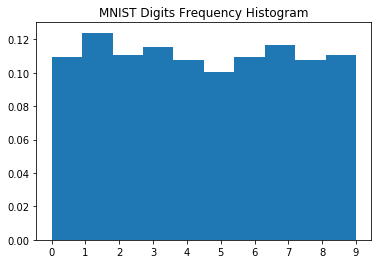

In [31]:
for i in range(0, 9):
    print ("Prior probability for ", i, ": ", calculatePrior(i))

# plots a histogram of the labels, density = True is for normalization
plt.hist(labels, bins = 10, density = True)
plt.xticks(np.arange(10), ['0','1','2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('MNIST Digits Frequency Histogram')
plt.show()

# changed this because I think they wanted a normalized historgram, not just a plot of counts
#plt.bar(x, height= [counts(0), counts(1), counts(2), counts(3), counts(4), counts(5), counts(6), counts(7), counts(8), counts(9)]) 

#### (d)

In [5]:
def euclideanDist(img1, img2):
    return np.linalg.norm(img2-img1)

In [6]:
# find one of each digit
listofDigits = [findDigit(i, data_shaped) for i in range(10)]

# separate list of digits and their indices
digits = []
dig_indxs = []
for digitTuple in listofDigits:
    digits.append(digitTuple[0])
    dig_indxs.append(digitTuple[1])

In [7]:
# find nearest neighbor to each digit
# create a list of nearest neighbors to each example digit (example digits are the same ones printed before)

nearest_neighbors = []

for i, digit in enumerate(digits):
    indx = dig_indxs[i]
    
    #distances = np.linalg.norm(data - digit)
    for j, img in enumerate(data_shaped):
        # skip the image that we are finding the nearest neighbor for
        if j == indx:
            continue
        # calculate distance
        dist = euclideanDist(np.array(digit), np.array(img))
        # update best distance
        if j == 0:
            best_dist = dist
            nearest_n = img
            best_indx = j
        else:
            if dist < best_dist:
                best_dist = dist
                nearest_n = img
                best_indx = j
    nearest_neighbors.append((nearest_n, best_indx))

The nearest neighbor for the image selected for 0 is at index 12950
The nearest neighbor for the image selected for 1 is at index 29704
The nearest neighbor for the image selected for 2 is at index 9536
* The nearest neighbor for the image selected for 3 is at index 8981
The nearest neighbor for the image selected for 4 is at index 14787
The nearest neighbor for the image selected for 5 is at index 30073
The nearest neighbor for the image selected for 6 is at index 16240
The nearest neighbor for the image selected for 7 is at index 15275
The nearest neighbor for the image selected for 8 is at index 32586
The nearest neighbor for the image selected for 9 is at index 35742


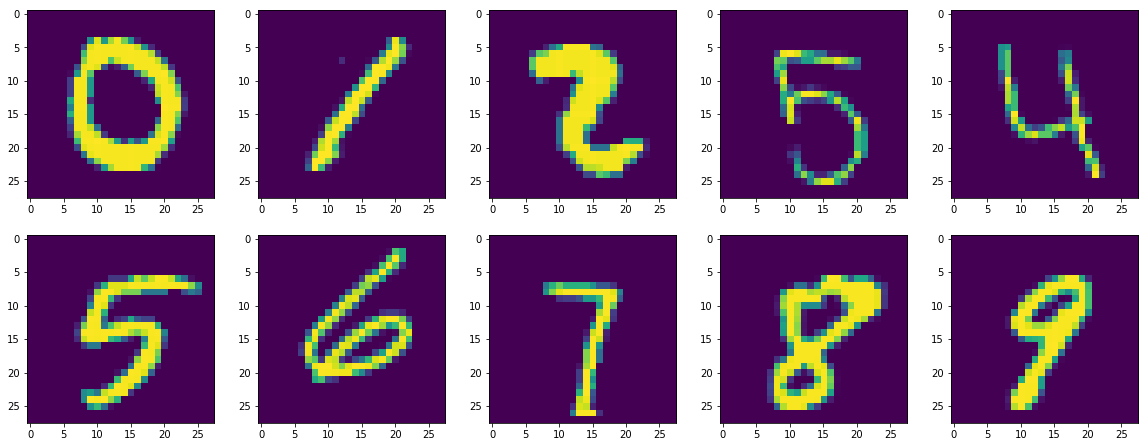

In [8]:
plt.figure(figsize=(20,20))
for i, neighbor in enumerate(nearest_neighbors):
    neighbor, indx = neighbor
    if i != labels[indx]:
        print('*', end = ' ')
    print('The nearest neighbor for the image selected for', i, 'is at index', indx)
    plt.subplot(5,5,i+1)
    imshow(neighbor)

#### (e)

In [6]:
zerosIndexes = []
onesIndexes = []
for i, label in enumerate(labels):
    if label == 0:
        zerosIndexes.append(i)
    elif label == 1:
        onesIndexes.append(i)

In [7]:
distZeros = []
for indx, i in enumerate(zerosIndexes[::1000]): # change this back to full array before submission
    for j in zerosIndexes[indx+1:1000]: # change this back to full array before submission
        distZeros.append(euclideanDist(data[i], data[j]))

In [8]:
distOnes = []
for indx,i in enumerate(onesIndexes[::1000]): # change this back to full array before submission
    for j in onesIndexes[indx+1:1000]: # change this back to full array before submission
        distOnes.append(euclideanDist(data[i], data[j]))

In [26]:
distImposters = []
for indx,i in enumerate(zerosIndexes[::1000]): # change this back to full array before submission
    for j in onesIndexes[indx+1:1000]: # change this back to full array before submission
        distImposters.append(euclideanDist(data[i], data[j]))

for indx,i in enumerate(onesIndexes[::1000]): # change this back to full array before submission
    for j in zerosIndexes[indx+1:1000]: # change this back to full array before submission
        distImposters.append(euclideanDist(data[i], data[j]))

In [28]:
distGenuine = distZeros + distOnes

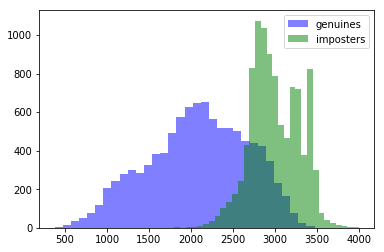

In [29]:
#plt.hist(distZeros, color = 'k', label = 'genuine zeros', bins = 32, alpha = 0.5)
#plt.hist(distOnes, color = 'b', label = 'genuine ones', bins = 32, alpha = 0.5)
plt.hist(distGenuine, color = 'b', label = 'genuines', bins = 32, alpha = 0.5)
plt.hist(distImposters, color = 'g', label = 'imposters', bins = 32, alpha = 0.5)
plt.legend()

In [30]:
max(distGenuine + distImposters)

3998.3251493594166

#### (f)

In [34]:
ROCPointsX = []
ROCPointsY = []
distTotal = distGenuine + distImposters

for j in range(0, math.ceil(max(distTotal)), 500):
    
    TP = sum(i > j for i in distGenuine) 
    #FN = len(distGenuine) - TP
    FN = sum(i < j for i in distGenuine)
    
    TN = sum(i < j for i in distImposters) 
    #FP = len(distImposters) - TN
    FP = sum(i > j for i in distImposters) 

    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    #TNR = TN / (FP + TN)
    
    ROCPointsY.append(TPR)
    ROCPointsX.append(FPR)

#zeroOneLabels = [0 for i in zerosIndexes]
#for i in onesIndexes:
 #   zeroOneLabels.append(1)


Text(0,0.5,'TPR')

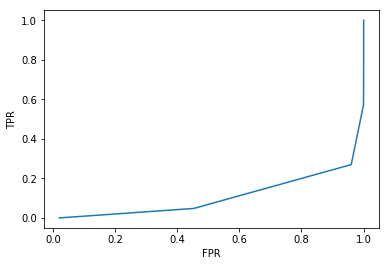

In [32]:
# Gives exactly the opposite of what we need - work in progress to fix 
plt.plot(ROCPointsX, ROCPointsY)
plt.xlabel("FPR")
plt.ylabel("TPR")

Text(0,0.5,'TPR')

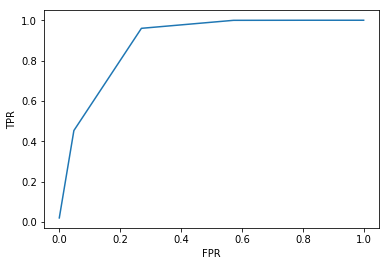

In [33]:
# gives what we need
plt.plot(ROCPointsY, ROCPointsX)
plt.xlabel("FPR")
plt.ylabel("TPR")

#### (g)

In [42]:
def KNNclassify(mynum, nums, labels, k):
    '''This function goes through all of the MNIST digits (nums) and checks if it is a nearest 
    neighbor to "mynum" which is a test digit that we are trying to see if we can classify after
    spliting the training data set into a test set and train set. The nums are all of the MNIST
    numbers split into the training set, the labels are all of the labels corresponding to nums.
    Finally, k is the number of neighbors.'''
    
    # find nearest neighbors
    neighbors = []
    for i, num in enumerate(nums):
        # find distance of myitem to the item we are checking
        distance = euclideanDist(mynum, num)
        
        # start with the first k items in nums
        if len(neighbors) < k: 
            neighbors.append((distance, labels[i]))
            # sort in ascending order by distance
            neighbors = sorted(neighbors)
        
        # if the distance of this item is less than max distance replace max item with this one
        elif neighbors[len(neighbors)-1][0] > distance: 
            neighbors[len(neighbors)-1] = (distance, labels[i])
            # sort in ascending order by distance
            neighbors = sorted(neighbors)
    
    # need to determine where to classify based on the labels of the neighbors   
    # the classes are just 0-9, so we can represent in an array
    class_nums = np.zeros(10)
    for neighbor in neighbors:
        class_nums[neighbor[1]] += 1
    
    # determine the best classifications based on the dict created for the neighbors
    best_guess = np.argmax(class_nums)
                
    return best_guess

#### (h)

In [43]:
# not tested yet
X = data[:5000] # remove this indexing before submission
Y = labels[:5000] # remove this indexing before submission
cv = KFold(3)

# initialize arrays for analysis
accuracy = []
predictions = []
actuals = []

# crossvalidation
for train, test in cv.split(X, Y):
    total = len(X[test])
    correct = 0
    # test all values in test data
    for i, testnum in enumerate(X[test]):
        best_guess = KNNclassify(testnum, X[train], Y[train], k = 3)
        predictions.append(best_guess)
        if best_guess == Y[test][i]: # check if the best_guess is the same as the label
            correct += 1
    # find the accuracy for this iteration
    accuracy.append((correct/total)*100)
    actuals += list(Y[test])

print('The average accuracy of a 3NN classifier after K-fold crossvalidation is ', np.mean(accuracy))

KeyboardInterrupt: 

#### (i)

In [ ]:
# need to use predictions and actuals to make a confusion matrix
confusion_m = confusion_matrix(actuals, predictions)
print(confusion_m)

# plot the confusion_matrix in a pretty way
fig, ax = plt.subplots()
imshow(confusion_m)
plt.colorbar()
classes = [0,1,2,3,4,5,6,7,8,9]
ax.set(xticks=classes,yticks=classes,xticklabels=classes,yticklabels=classes,ylabel='True',xlabel='Predicted');

#### (j)

In [ ]:
# not run yet
all_predictions = []
for i, testnum in enumerate(testing_data.values):
    all_predictions.append(KNNclassify(testnum, data, labels, k = 3))

all_pred_df = pd.Dataframe(all_predictions)
all_pred_df.to_csv('MNIST_submission_Simi_Eva.csv')

## 2. The Titanic Disaster

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
# read training and testing data
training_data_t=pd.read_csv("Titanic_Data/train_titanic.csv")
testing_data_t=pd.read_csv("Titanic_Data/test_titanic.csv")
labels_t=training_data_t['Survived'].values #extract data labels

Can ignore PassengerId and Name because these are just identifying factors for the person. Can also ignore Cabin because 77% of values in cabin are NaN.

In [41]:
data_t = training_data_t.drop(['Survived', 'PassengerId', 'Name', 'Cabin'],axis=1).values 

In [42]:
count = 0
for i in training_data_t['Cabin'].values:
    if i != i:
        count+=1
percent_nan = count/(len(training_data_t['Cabin'].values))
print(percent_nan*100, '% of people have NaN for their cabin')

count = 0
for i in training_data_t['Age'].values:
    if i != i:
        count+=1
percent_nan = count/(len(training_data_t['Age'].values))
print(percent_nan*100, '% of people have NaN for their age')

77.10437710437711 % of people have NaN for their cabin
19.865319865319865 % of people have NaN for their age


In [43]:
lr = LogisticRegression()
lr.fit(data_t, labels_t)

ValueError: could not convert string to float: 'Q'